In [2]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.losses import categorical_crossentropy
from keras.optimizers import adam
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import load_img
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [3]:
mnist = np.load("../datasets/mnist_train_small.npy")

In [4]:
X, y = mnist[:, 1:], mnist[:, 0]

In [5]:
y_oe = (y % 2) == 0 

In [7]:
ohe = OneHotEncoder(categories="auto")

In [8]:
y_hot = ohe.fit_transform(y.reshape(-1, 1))

In [9]:
y_hot_oe = ohe.fit_transform(y_oe.reshape(-1, 1))

In [27]:
in_layer = Input((784,))
d1 = Dense(400, activation="tanh")(in_layer)
d2 = Dense(200, activation="tanh")(d1)
d3 = Dense(100, activation="tanh")(d2)
d41 = Dense(50, activation="tanh")(d3)
d42 = Dense(30, activation="tanh")(d3)
o1 = Dense(10, activation="softmax", name="out1")(d41)
o2 = Dense(2, activation="softmax", name="out2")(d42)


In [28]:
model = Model(inputs=[in_layer], outputs=[o1, o2])

In [29]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 400)          314000      input_3[0][0]                    
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 200)          80200       dense_15[0][0]                   
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 100)          20100       dense_16[0][0]                   
__________________________________________________________________________________________________
dense_18 (

In [30]:
# X_train, X_test, y_train, y_test = train_test_split(
# ...     X, y_hot, test_size=0.33, random_state=42)

In [31]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [32]:
model.fit(X, [y_hot, y_hot_oe], epochs=10)

Epoch 1/10
19999/19999 [==============================] - 4s 197us/step - loss: 0.8518 - out1_loss: 0.5980 - out2_loss: 0.2539 - out1_acc: 0.8152 - out2_acc: 0.8953
Epoch 2/10
19999/19999 [==============================] - 3s 159us/step - loss: 0.6546 - out1_loss: 0.4601 - out2_loss: 0.1945 - out1_acc: 0.8515 - out2_acc: 0.9243
Epoch 3/10
19999/19999 [==============================] - 3s 163us/step - loss: 0.5892 - out1_loss: 0.4157 - out2_loss: 0.1736 - out1_acc: 0.8663 - out2_acc: 0.9349
Epoch 4/10
19999/19999 [==============================] - 4s 192us/step - loss: 0.5482 - out1_loss: 0.3845 - out2_loss: 0.1638 - out1_acc: 0.8761 - out2_acc: 0.9377
Epoch 5/10
19999/19999 [==============================] - 4s 206us/step - loss: 0.5394 - out1_loss: 0.3720 - out2_loss: 0.1674 - out1_acc: 0.8797 - out2_acc: 0.9341
Epoch 6/10
19999/19999 [==============================] - 4s 177us/step - loss: 0.5212 - out1_loss: 0.3598 - out2_loss: 0.1614 - out1_acc: 0.8829 - out2_acc: 0.9380
Epoch 7/10

In [33]:
model.evaluate(X, [y_hot, y_hot_oe])

19999/19999 [==============================] - 1s 62us/step


[0.43579668959436835,
 0.3075906920775192,
 0.1282059982559837,
 0.9043452172638434,
 0.9515975798342883]

[[6 2 0 7 1 5 9 3 4 8]]
[[0 1]]


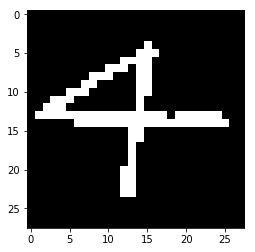

In [44]:
img = load_img("../datasets/nums/four.jpeg", target_size=(28, 28), grayscale=True)
type(img)
plane = (np.array(img) < 100).astype(int) * 255
plt.imshow(plane, cmap="gray")
val, oe = model.predict(np.array([plane.flatten()]))
print(val.argsort(axis=1))
print(oe.argsort(axis=1))

[[7 0 1 6 9 4 5 2 3 8]]


[[1 0]]
